In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from os import listdir, path as os_path

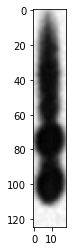

In [2]:
im_path = 'data/images_classified/PN/6953__NGC 6543.tiff'
im_1 = cv2.imread(im_path, -1)[:125]
plt.gray();
plt.imshow(im_1);
plt.show()

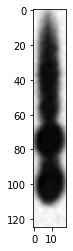

In [3]:
im_path_2 = 'data/AstroDataset/PN/NGC 6543.tiff'
im_2 = np.flip(cv2.imread(im_path_2, -1)[:125,12:31], axis=0)
plt.gray();
plt.imshow(im_2);
plt.show()

In [4]:
im_1.shape, im_1.min(), im_1.max()

((125, 19), 5390, 14745)

In [5]:
im_2.shape, im_2.min(), im_2.max()

((125, 19), 21560, 58982)

In [6]:
im_2.max()/im_1.max(), im_2.min()/im_1.min()

(4.0001354, 4.0)

In [7]:
(im_2/im_1).mean(), (im_2/im_1).std()

(4.000147821010412, 2.4200073478986237e-05)

In [8]:
img = cv2.GaussianBlur(im_1, (3, 3), 2, 2)

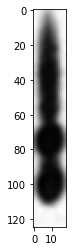

In [9]:
plt.gray();
plt.imshow(img);
plt.show()

In [10]:
(im_2/img).mean(), (im_2/img).std()

(3.9941890620201916, 0.11013665085552722)

In [11]:
# cv2.imwrite('data/test.tiff', im_1*4)

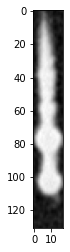

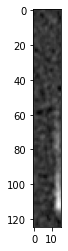

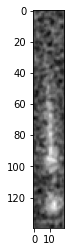

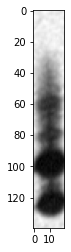

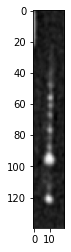

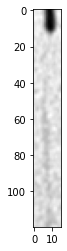

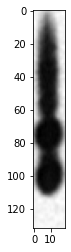

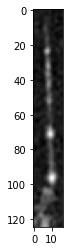

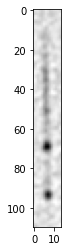

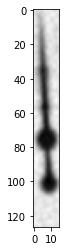

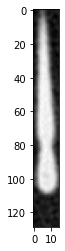

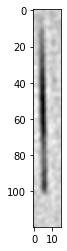

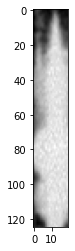

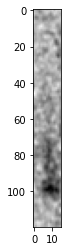

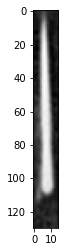

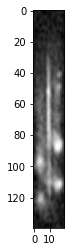

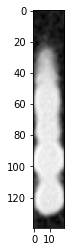

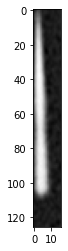

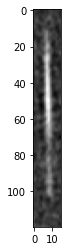

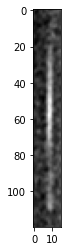

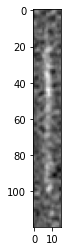

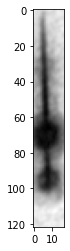

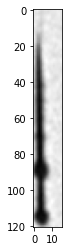

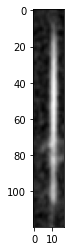

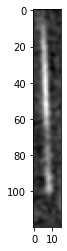

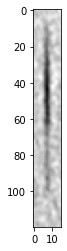

In [12]:
dir_path = 'data/images_classified/PN'
for im_name in listdir(dir_path):
    im_path = (os_path.join(dir_path, im_name))
    im = cv2.imread(im_path, -1)
    plt.gray();
    plt.imshow(im);
    plt.show()
    cv2.imwrite(f'data/PN/{im_name}', im*4)

In [13]:
combined_path = 'data/Combined.csv'
combined_extracted_path = 'data/Combined_extracted.csv'

df_PN_missing_path = 'data/Temporary Datasets/df_PN_missing.csv'
df_PN_extracted_path = 'data/Temporary Datasets/df_PN_extracted.csv'

existing_images_path = 'data/PN/'

coordinates_path = 'data/coordinates.csv.npy'

In [14]:
data = pd.read_csv(combined_path)
data_extracted = pd.read_csv(combined_extracted_path, index_col='Unnamed: 0')

In [15]:
data.head()

,index,root,_RAJ2000,_DEJ2000,Cl,Name,plate,path,dx,dy
0,0,initial,0.048750,5.388056,Sy1,RXS J00001+0523,NaN,NaN,0.0,0.0
1,1,initial,0.610000,3.351667,Sy1,MARK 543,NaN,NaN,0.0,0.0
2,2,initial,0.883750,-10.744722,Sy1,NGC 7808,NaN,NaN,0.0,0.0
3,3,initial,1.039583,45.440278,Sy1,RXS J00041+4526,NaN,NaN,0.0,0.0
4,4,initial,1.456250,10.376944,Sy1,RXS J00058+1022,NaN,NaN,0.0,0.0


In [16]:
data_extracted.head()

,index,root,_RAJ2000,_DEJ2000,Cl,Name,plate,path,dx,dy
1,1,initial,0.610000,3.351667,Sy1,MARK 543,fbs1173_cor,data/images/1__MARK 543.tiff,3983.0,5092.0
6,6,initial,1.581250,20.203056,Sy1,MARK 335,fbs0075_cor,data/images/6__MARK 335.tiff,2091.0,7178.0
10,10,initial,2.629167,10.974444,Sy1,III Zw 2,fbs0530_cor,data/images/10__III Zw 2.tiff,7883.0,4554.0
15,15,initial,5.479583,-10.720833,Sy1,SDSS J00219-1043,fbs0910_cor,data/images/15__SDSS J00219-1043.tiff,1650.0,588.0
18,18,initial,9.087500,45.665000,Sy1,Zw 535.012,fbs1346_cor,data/images/18__Zw 535.012.tiff,8340.0,954.0


In [17]:
data_extracted['Cl'].value_counts(), data['Cl'].value_counts()

(sd     647
 C      530
 Mrk    270
 M      210
 Sy1    156
 WD     155
 QSO    107
 cv      48
 PN      18
 Name: Cl, dtype: int64,
 sd     1668
 WD     1160
 M      1136
 C      1088
 QSO     978
 Mrk     853
 Sy1     838
 cv      217
 PN       75
 Name: Cl, dtype: int64)

In [18]:
df = pd.DataFrame(columns=data.columns)
for im_path in listdir(existing_images_path):
    im_name = im_path.split('__')[-1].split('.tiff')[0]
    row = data[data['Name'] == im_name]
    if row.shape[0]:
        df = pd.concat([df, row], axis=0)
    else:
        print(im_name)

In [19]:
df

,index,root,_RAJ2000,_DEJ2000,Cl,Name,plate,path,dx,dy
6922,7162,initial,251.122417,23.796806,PN,NGC 6210,NaN,NaN,0.0,0.0
6928,7194,initial,194.866292,27.635861,PN,H 4-1,NaN,NaN,0.0,0.0
6941,7279,initial,98.531167,44.776028,PN,NGC 2242,NaN,NaN,0.0,0.0
6891,6993,initial,316.045167,-11.365722,PN,NGC 7009,NaN,NaN,0.0,0.0
6930,7202,initial,268.595708,27.999222,PN,Vy 1-2,NaN,NaN,0.0,0.0
6898,7042,initial,144.787125,-2.818222,PN,A 33,NaN,NaN,0.0,0.0
6953,7324,initial,269.640250,66.633000,PN,NGC 6543,NaN,NaN,0.0,0.0
6937,7250,initial,250.076333,38.704722,PN,DDDM 1,NaN,NaN,0.0,0.0
6895,7031,initial,75.924208,-6.159444,PN,MaC 2-1,NaN,NaN,0.0,0.0
6958,7348,initial,188.278625,82.563611,PN,IC 3568,NaN,NaN,0.0,0.0


In [20]:
df_PN_extracted = pd.DataFrame(columns=data.columns)
df_PN_missing = pd.DataFrame(columns=data.columns)

for im_path in listdir(existing_images_path):
    im_name = im_path.split('__')[-1].split('.tiff')[0]
    row = data_extracted[data_extracted['Name'] == im_name]
    if row.shape[0]:
        df_PN_extracted = pd.concat([df_PN_extracted, row], axis=0)
    else:
        df_PN_missing = pd.concat([df_PN_missing, df[df['Name'] == im_name]], axis=0)

In [21]:
df_PN_extracted

,index,root,_RAJ2000,_DEJ2000,Cl,Name,plate,path,dx,dy
6922,7162,initial,251.122417,23.796806,PN,NGC 6210,fbs0639_cor,data/images/6922__NGC 6210.tiff,7281.0,7127.0
6941,7279,initial,98.531167,44.776028,PN,NGC 2242,fbs0954_cor,data/images/6941__NGC 2242.tiff,7975.0,9049.0
6891,6993,initial,316.045167,-11.365722,PN,NGC 7009,fbs1069_cor,data/images/6891__NGC 7009.tiff,3579.0,8105.0
6930,7202,initial,268.595708,27.999222,PN,Vy 1-2,fbs0794_cor,data/images/6930__Vy 1-2.tiff,1311.0,7090.0
6953,7324,initial,269.640250,66.633000,PN,NGC 6543,fbs0258_cor,data/images/6953__NGC 6543.tiff,437.0,3542.0
6937,7250,initial,250.076333,38.704722,PN,DDDM 1,fbs0454_cor,data/images/6937__DDDM 1.tiff,5272.0,4248.0
6895,7031,initial,75.924208,-6.159444,PN,MaC 2-1,fbs1167_cor,data/images/6895__MaC 2-1.tiff,3535.0,1849.0
6958,7348,initial,188.278625,82.563611,PN,IC 3568,fbs1254_cor,data/images/6958__IC 3568.tiff,3282.0,6375.0
6925,7180,initial,193.890792,25.891528,PN,LoTr 5,fbs1163M_cor,data/images/6925__LoTr 5.tiff,7461.0,1924.0
6907,7081,initial,122.803458,10.954750,PN,BN 0808+11,fbs0688_cor,data/images/6907__BN 0808+11.tiff,8613.0,4816.0


In [22]:
df_PN_missing

,index,root,_RAJ2000,_DEJ2000,Cl,Name,plate,path,dx,dy
6928,7194,initial,194.866292,27.635861,PN,H 4-1,NaN,NaN,0.0,0.0
6898,7042,initial,144.787125,-2.818222,PN,A 33,NaN,NaN,0.0,0.0
6920,7143,initial,112.294500,20.910222,PN,NGC 2392,NaN,NaN,0.0,0.0
6894,7027,initial,307.887917,-7.089444,PN,A 70,NaN,NaN,0.0,0.0
6926,7186,initial,277.829417,26.935056,PN,A 46,NaN,NaN,0.0,0.0
6915,7118,initial,148.246250,13.742500,PN,BN 0950+13,NaN,NaN,0.0,0.0
6887,6962,initial,63.565750,-12.741444,PN,NGC 1535,NaN,NaN,0.0,0.0
6902,7059,initial,133.554792,8.899639,PN,A 31,NaN,NaN,0.0,0.0


In [23]:
df_PN_missing.to_csv(df_PN_missing_path)
df_PN_extracted.to_csv(df_PN_extracted_path)

In [24]:
missing_indices = set(df_PN_missing.index)

In [25]:
missing_indices

{6887, 6894, 6898, 6902, 6915, 6920, 6926, 6928}

In [26]:
coordinates = np.load('data/coordinates.csv.npy') - 1

In [27]:
def getPlateCoordinates(xy, mx, my):
    return np.where((xy[:, 0] >= 0) & (xy[:, 0] < mx) & (xy[:, 1] >= 0) & (xy[:, 1] < my))[0]

In [28]:
found_indices = set({})
found_plates = set({})

In [29]:
for i, coordinate in enumerate(coordinates):
    plate_datapoints = set(getPlateCoordinates(coordinate, 9601, 9601))
    matching_indices = missing_indices.intersection(plate_datapoints)
    if not len(matching_indices): continue
    found_plates.add(i)
    for m_index in matching_indices:
        found_indices.add(m_index)
found_indices

{6887, 6894, 6898, 6902, 6915, 6920, 6926, 6928}

In [30]:
# found_plates

In [31]:
combined_extracted_path = 'data/Combined_extracted.csv'
data_extracted = pd.read_csv(combined_extracted_path, index_col='Unnamed: 0')
data_extracted.head()

,index,root,_RAJ2000,_DEJ2000,Cl,Name,plate,path,dx,dy
1,1,initial,0.610000,3.351667,Sy1,MARK 543,fbs1173_cor,data/images/1__MARK 543.tiff,3983.0,5092.0
6,6,initial,1.581250,20.203056,Sy1,MARK 335,fbs0075_cor,data/images/6__MARK 335.tiff,2091.0,7178.0
10,10,initial,2.629167,10.974444,Sy1,III Zw 2,fbs0530_cor,data/images/10__III Zw 2.tiff,7883.0,4554.0
15,15,initial,5.479583,-10.720833,Sy1,SDSS J00219-1043,fbs0910_cor,data/images/15__SDSS J00219-1043.tiff,1650.0,588.0
18,18,initial,9.087500,45.665000,Sy1,Zw 535.012,fbs1346_cor,data/images/18__Zw 535.012.tiff,8340.0,954.0


In [32]:
if not len(data_extracted.index.intersection(df_PN_extracted.index)):
    data_extracted = pd.concat([data_extracted, df_PN_extracted])
else:
    print(sorted(df_PN_extracted.index))
    print(sorted(data_extracted.index.intersection(df_PN_extracted.index)))
    print(ValueError('Dataframes have mutual indices'))

[6891, 6895, 6907, 6909, 6922, 6924, 6925, 6929, 6930, 6931, 6934, 6937, 6938, 6939, 6941, 6943, 6953, 6958]
[6891, 6895, 6907, 6909, 6922, 6924, 6925, 6929, 6930, 6931, 6934, 6937, 6938, 6939, 6941, 6943, 6953, 6958]
Dataframes have mutual indices


In [33]:
data_extracted.to_csv(combined_extracted_path)

In [34]:
data_extracted['Cl'].value_counts()

sd     647
C      530
Mrk    270
M      210
Sy1    156
WD     155
QSO    107
cv      48
PN      18
Name: Cl, dtype: int64

In [35]:
missing_indices

{6887, 6894, 6898, 6902, 6915, 6920, 6926, 6928}

In [36]:
data_extracted.index.intersection(df_PN_missing.index)

Int64Index([], dtype='int64')

In [37]:
for row, value in df_PN_missing.iterrows():
    print(row)

6928
6898
6920
6894
6926
6915
6887
6902


In [38]:
for row, value in df_PN_missing.iterrows():
    df_PN_missing.loc[row, 'path'] = f'data/images/{row}__{value["Name"]}.tiff'

In [39]:
df_PN_missing

,index,root,_RAJ2000,_DEJ2000,Cl,Name,plate,path,dx,dy
6928,7194,initial,194.866292,27.635861,PN,H 4-1,NaN,data/images/6928__H 4-1.tiff,0.0,0.0
6898,7042,initial,144.787125,-2.818222,PN,A 33,NaN,data/images/6898__A 33.tiff,0.0,0.0
6920,7143,initial,112.294500,20.910222,PN,NGC 2392,NaN,data/images/6920__NGC 2392.tiff,0.0,0.0
6894,7027,initial,307.887917,-7.089444,PN,A 70,NaN,data/images/6894__A 70.tiff,0.0,0.0
6926,7186,initial,277.829417,26.935056,PN,A 46,NaN,data/images/6926__A 46.tiff,0.0,0.0
6915,7118,initial,148.246250,13.742500,PN,BN 0950+13,NaN,data/images/6915__BN 0950+13.tiff,0.0,0.0
6887,6962,initial,63.565750,-12.741444,PN,NGC 1535,NaN,data/images/6887__NGC 1535.tiff,0.0,0.0
6902,7059,initial,133.554792,8.899639,PN,A 31,NaN,data/images/6902__A 31.tiff,0.0,0.0


In [40]:
if not len(data_extracted.index.intersection(df_PN_missing.index)):
    data_extracted = pd.concat([data_extracted, df_PN_missing])
else:
    print(sorted(df_PN_missing.index))
    print(sorted(data_extracted.index.intersection(df_PN_missing.index)))
    raise ValueError('Dataframes have mutual indices')

In [41]:
data_extracted['Cl'].value_counts()

sd     647
C      530
Mrk    270
M      210
Sy1    156
WD     155
QSO    107
cv      48
PN      26
Name: Cl, dtype: int64

In [42]:
data_extracted.to_csv('data/Combined_extracted_PN.csv')